在线性回归问题中，使用sklearn包中自带的糖尿病数据集：
1. 数据集有442个样本
2. 每个样本有10个特征


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,discriminant_analysis,cross_validation

In [13]:
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data,diabetes.target,test_size = 0.25,random_state = 0)


### 线性回归模型
LinearRegressing 是sklearn提供的线性回归模型，print出分别：
1. 回归系数、截距
2. 测试均方差
3. 预测性能得分:
   $1-\frac{\Sigma_{T_{test}}(y_i-\hat{y}_i)^2}{(y_i-\hat{y}_i)^2}$
    

In [16]:
def test_LinearRegressing(*data):
    X_train,X_test,Y_train,Y_test = data
    regr = linear_model.LinearRegression()
    regr.fit(X_train,Y_train)
    print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - Y_test) ** 2))
    print('Score: %.2f' % regr.score(X_test, Y_test))
    

In [23]:
X_train, X_test, Y_train, Y_test = load_data()
test_LinearRegressing(X_train,X_test,Y_train,Y_test)

Coefficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], intercept 153.07
Residual sum of squares: 3180.20
Score: 0.36


### 线性模型的正则化
当多元线性回归的$\vec{x}^T\vec{x}$不是满秩的时候，需要引入正则向，常用的正则化方法有岭回归、LASSO和Elastic Net

### 岭回归

In [29]:
def test_Ridge(*data):
    X_train,X_test,y_train,y_test=data
    regr = linear_model.Ridge()
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [30]:
X_train, X_test, Y_train, Y_test = load_data()
test_Ridge(X_train,X_test,Y_train,Y_test)

Coefficients:[  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017], intercept 152.45
Residual sum of squares: 3192.33
Score: 0.36


In [36]:
def test_Ridge_alpha(*data):
    '''
    测试 Ridge 的预测性能随 alpha 参数的影响
    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    alphas=[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores=[]
    for i,alpha in enumerate(alphas):#enumerate 函数的用法可以学习
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Ridge")
    plt.show()

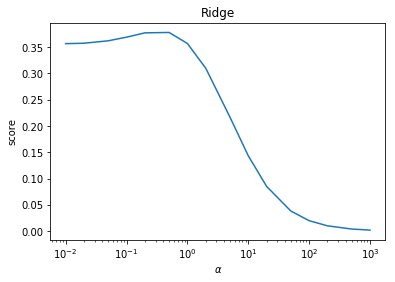

In [37]:
X_train, X_test, Y_train, Y_test = load_data()
test_Ridge_alpha(X_train,X_test,Y_train,Y_test)

### LASSO回归
Lasso回归与岭回归的不同之处在于它的惩罚项是基于L1范数，而岭回归是L2范数